## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 2: Prediction using Unsupervised Learning ML

In this task it is required to predict from the given ‘Iris’ dataset, the optimum number of clusters and represent it visually.
### Steps:

* 1 - Importing the dataset
* 2 - Visualizing the dataset
* 3 - Preparation Data
* 4 - Training of Model
* 5 - Visualizing the model
* 6 - Making predcitions
* 7 - Evaluating the model

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings as wg
wg.filterwarnings("ignore")

In [73]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Cleaning the data by removing Column id & Species for unsupervised learning problem.

In [88]:
# iris_d = iris.drop(columns= ['Species' ,'Id'] )
# iris_d.head()
iris_df=data.iloc[:, [0, 1, 2, 3]].values

In [97]:
# within-cluster sum of squares
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)

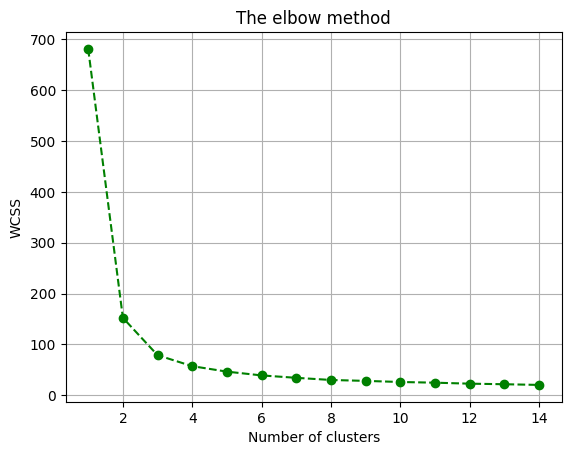

In [103]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

# mpl.plot(range(1, 15), wcss)
mpl.plot(range(1, 15), wcss, 'go--', color='green')
mpl.title('The elbow method')
mpl.xlabel('Number of clusters')
mpl.ylabel('WCSS') # Within cluster sum of squares
mpl.grid()
mpl.show()

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

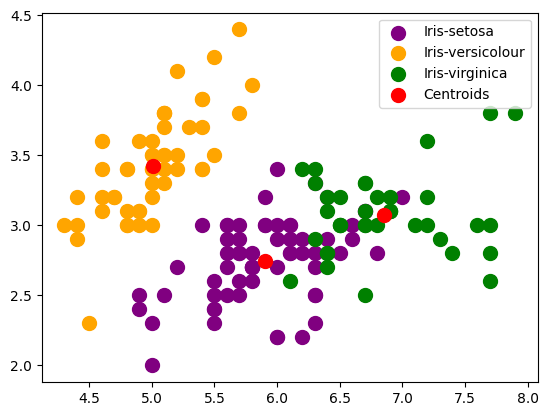

In [91]:
mpl.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
mpl.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
mpl.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
mpl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

mpl.legend()

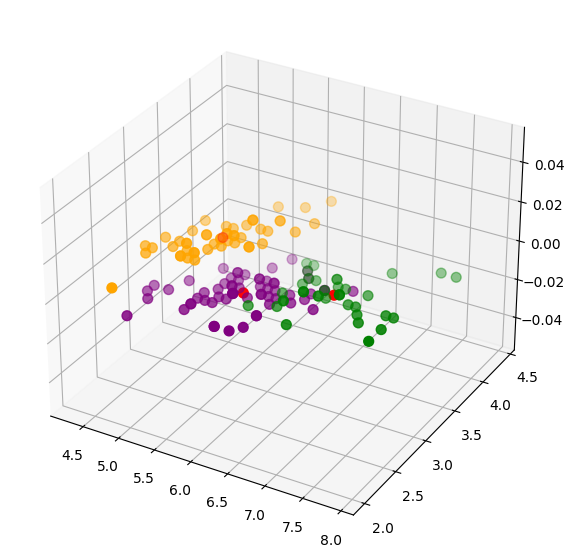

In [92]:
fig = mpl.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
mpl.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
mpl.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
mpl.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
mpl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
mpl.show()

In [93]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

In [ ]:
sns.violinplot(x="Cluster",y="petal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="petal length (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal length (cm)",data=data_with_clusters)
plt.show()